#HW2 - ml4786

In [3]:
%matplotlib inline

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import os
print("Place data files in '"+os.getcwd()+"/'")

Place data files in '/home/neil/Projects/ML4786/HW 2 - JAC/'


In [4]:
def csv_to_matrix(csv_file):
    return np.loadtxt(open(csv_file),delimiter=",")

In [5]:
def my_kmeans(X,us): #returns the cluster arrays   
    km = KMeans(n_clusters=2, init=us, n_init=1)
    km.fit(X)
    classifications = km.predict(X)
    C1 = []
    C2 = []
    for c,point in zip(classifications, K1):
        if c==0: 
            C1.append(point)
        else:
            C2.append(point)
    return np.array(C1), np.array(C2)

In [15]:
def plot_2cluster(C1, C2, US, centroid=True):
    plt.scatter(C1[:,0],C1[:,1], c='red',  alpha=1, marker="o", label="C_1")
    plt.scatter(C2[:,0],C2[:,1], c='blue', alpha=1, marker="o", label="C_2")
    if centroid:
        plt.scatter(US[:,0],US[:,1], c='green', alpha=1, marker="+", label="Centroids")
    plt.legend(loc='upper right')
    plt.show()

## Kmeans_I

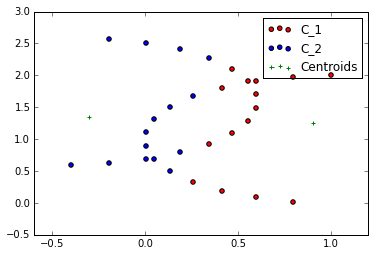

In [7]:
# Get data
K1 = csv_to_matrix('XkmeansI.csv') 
u1 = [0.9, 1.25]
u2 = [-0.29999999999999993, 1.35]
us = np.array([u1, u2])
# Run kmeans
K1_C1, K1_C2 = my_kmeans(K1,us)
# Plot
plot_2cluster(K1_C1, K1_C2, us)

## Kmeans_2

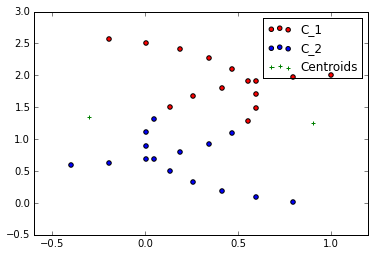

In [8]:
# Get data
K2 = csv_to_matrix('XkmeansII.csv') 
u1 = [0.9, 1.25]
u2 = [-0.29999999999999993, 1.35]
us = np.array([u1, u2])
# Run kmeans
K2_C1, K2_C2 = my_kmeans(K2,us)
# Plot
plot_2cluster(K2_C1, K2_C2, us)

## SingleLink

In [11]:
def single_link(clusters, len_clusters, first=True):
    '''
    Computes the single clink clustering for the given points:    
    Arguments:
        m: A list with shape (n,2)
    Returns:
        A 0-1 vector deliminating the clusters, in the same order as the input.
    '''
    #Handle initial clustering
    if first: clusters =[   [(pt,idx)] for idx,pt in enumerate(clusters)   ]

    #base case
    if len(clusters) == 2:
        C1 = [ pt for pt,idx in clusters[0]]
        C2 = [ pt for pt,idx in clusters[1]]
        return np.array(C1), np.array(C2)
    ###Single Link Algorithm###
    # Find closest pair
    j1,j2 = None, None
    min_dist = float('inf')
    for idx1,c1 in enumerate(clusters):
        for idx2,c2 in enumerate(clusters):
            if idx1 != idx2:
                for p,_ in c1:
                    for q,_ in c2:
                        d = np.linalg.norm(p-q)
                        if d < min_dist:
                            j1, j1_idx = c1, idx1
                            j2, j2_idx = c2, idx2
                            min_dist = d
    # Update clustesr
    del clusters[j1_idx]
    del clusters[j2_idx-1] #minus becasue I just deleted
    j1.extend(j2)
    clusters.append(j1)
    #Recurr
    return single_link(clusters, len_clusters, first=False)

## SingleLink_I

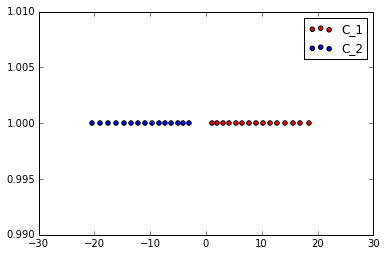

In [16]:
# Get data
S1 = csv_to_matrix('XslinkI.csv') 
# Run Slink
S1_C1, S1_C2 = single_link(S1, len(S1))
# Plot
plot_2cluster(S1_C1, S1_C2, [], False)

## SingleLink_2

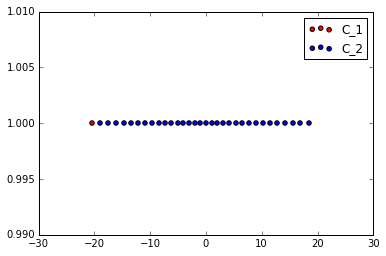

In [17]:
# Get data
S1 = csv_to_matrix('XslinkII.csv') 
# Run Slink
S1_C1, S1_C2 = single_link(S1, len(S1))
# Plot
plot_2cluster(S1_C1, S1_C2, [], False)

## Spectral Clustering

In [146]:
from sklearn.cluster import SpectralClustering
def sk_spectral_clustering(A):
    sc = SpectralClustering(n_clusters=2, eigen_solver='arpack',n_init=1, affinity='precomputed')
    sc.fit(np_A)
    return sc.labels_.astype(np.int)

## Spectral Clustering 1

In [150]:
# Get data
A1 = csv_to_matrix('AspectralI.csv') 
# Run Spectral
clustering_assings1 = sk_spectral_clustering(A1)
# Plot
#plot_2cluster(S1_C1, S1_C2, [], False)
print clustering_assings1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Spectral Clustering 2

In [151]:
# Get data
A2 = csv_to_matrix('AspectralII.csv') 
# Run Spectral
clustering_assings2 = sk_spectral_clustering(A2)
# Plot
#plot_2cluster(S1_C1, S1_C2, [], False)
print clustering_assings2

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
